## **BCB546X Python Project**

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### **Functions**

##### The following function utilizes the 'SeqIO.parse()' function of Biopython.
##### 'SeqIO.parse()' takes a filename and file format as its arguments, and returns an iterator called a 'SeqRecord'.
##### A 'SeqRecord'is an object containing a sequence along with an ID tag and other possible attributes such as name and description.
##### https://biopython.org/wiki/SeqIO

In [3]:
def get_sequences_from_file(fasta_fn): #(1) Defines a function named 'get_sequences_from_file', which takes the name of a fasta file as its argument.
    sequence_data_dict = {} #(2) Initializes a dictionary named 'sequence_data_dict'.
    for record in SeqIO.parse(fasta_fn, "fasta"):  #(3) Initializes a for-loop over the 'SeqRecord' iterator extracted from the specified fasta file (1).
        description_list = record.description.split() #(4) Extracts the 'description' attribute from the 'SeqRecord', and splits it into a list in which each word from the description is a list item.
        species_name = description_list[1] + " " + description_list[2]  #(5) Pulls the second and third items (words) from the 'description_list' created in (4), separates them with a space, and names this string 'species_name'.
        sequence_data_dict[species_name] = record.seq  #(6) Creates an entry in the dictionary with the 'species_name' from (5) as the key and the sequence portion of the 'SeqRecord' as the value.
    return(sequence_data_dict)  #(7) Returns the above-generated dictionary as the output of this new function.

In [4]:
def translate_function(nucseq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq = ""
    for x,y,z in zip(nucseq[0::3],nucseq[1::3],nucseq[2::3]):
        codon = x + y + z
        if codon in ["TAA","TAG","AGA","AGG"]:
            break
        else:
            aa_seq += (mito_table.forward_table[codon])
    return(aa_seq)

In [5]:
from Bio.Seq import Seq  # Unnecessary
def alt_translator(nucseq):
    seq_object = nucseq.translate(table="Vertebrate Mitochondrial", to_stop=True)  # https://biopython.org/wiki/Seq
    aa_seq = ""
    for n in seq_object:
        aa_seq += n
    return(aa_seq)

In [6]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):  # https://biopython.org/wiki/ProtParam
    return(ProteinAnalysis(aa_seq).molecular_weight())

In [7]:
def gc_content(nucseq):
    gc = 0
    nuc = 0
    for n in nucseq:
        if n in ['G','C']:
            gc += 1
        if n in ['A','T','C','G']:
            nuc += 1
    gc_ratio = gc / nuc
    return(gc_ratio)

### **Main**

In [8]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")

In [9]:
bears_df = pd.read_csv("bears_mass.csv")

In [10]:
bears_df['Molecular_Weight'] = "NaN"

In [11]:
bears_df['GC_Content'] = "NaN"

In [12]:
bears_df

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


In [13]:
species_list = list(bears_df.species)

In [14]:
for key, value in cytb_seqs.items():
    aa_seq = alt_translator(value)
    bears_df.loc[bears_df.species == key, 'Molecular_Weight'] = compute_molecular_weight(aa_seq)
    bears_df.loc[bears_df.species == key, 'GC_Content'] = gc_content(value)
print(bears_df)

                  species     mass Molecular_Weight GC_Content
0          Ursus spelaeus  550.800          42458.8   0.437719
1            Ursus arctos  203.500          42414.7   0.437719
2        Ursus thibetanus   99.714          42306.7    0.45614
3        Melursus ursinus  100.030            42552   0.451754
4        Ursus americanus  110.560          42427.7   0.439474
5     Helarctos malayanus   47.020          42560.9   0.442982
6  Ailuropoda melanoleuca  118.200          42702.2   0.407895
7      Tremarctos ornatus  140.700          42384.8    0.44386
8         Ursus maritimus  425.100          42454.8   0.442982


In [15]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
## *Q2* What else is interesting about this species?

## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"

## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)


In [66]:
species_mass = bears_df.set_index('species').mass

Largest species is Ursus spelaeus


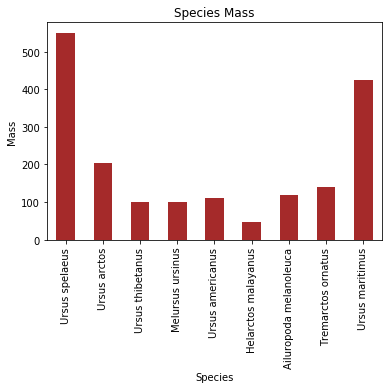

In [69]:
mass_plot = species_mass.plot(kind='bar',title='Species Mass', color='brown')
mass_plot.set_ylabel("Mass")
mass_plot.set_xlabel("Species")
# Largest species is Ursus spelaeus

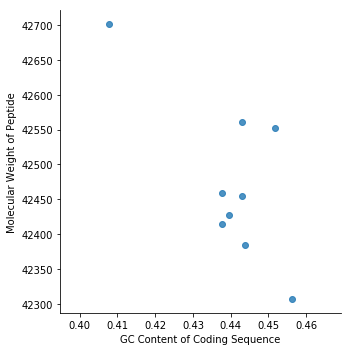

In [76]:
mw_gc = sns.lmplot('GC_Content', 'Molecular_Weight', data=bears_df, fit_reg=False)
mw_gc.set_axis_labels('GC Content of Coding Sequence', 'Molecular Weight of Peptide')

In [90]:
bears_df.to_csv('bears_mass_cytb.csv',index_label=False,float_format='%g')

In [91]:
bears_check = pd.read_csv('bears_mass_cytb.csv')

In [92]:
bears_df

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,42458.8,0.437719
1,Ursus arctos,203.500,42414.7,0.437719
2,Ursus thibetanus,99.714,42306.7,0.45614
3,Melursus ursinus,100.030,42552,0.451754
4,Ursus americanus,110.560,42427.7,0.439474
5,Helarctos malayanus,47.020,42560.9,0.442982
6,Ailuropoda melanoleuca,118.200,42702.2,0.407895
7,Tremarctos ornatus,140.700,42384.8,0.44386
8,Ursus maritimus,425.100,42454.8,0.442982


In [93]:
bears_check

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,42458.7992,0.437719
1,Ursus arctos,203.500,42414.7435,0.437719
2,Ursus thibetanus,99.714,42306.6735,0.456140
3,Melursus ursinus,100.030,42551.9900,0.451754
4,Ursus americanus,110.560,42427.7439,0.439474
5,Helarctos malayanus,47.020,42560.8910,0.442982
6,Ailuropoda melanoleuca,118.200,42702.1845,0.407895
7,Tremarctos ornatus,140.700,42384.8266,0.443860
8,Ursus maritimus,425.100,42454.7873,0.442982


In [ ]:
type(cytb_seqs[species_list[0]])

In [ ]:
cytb_seqs[species_list[0]]

In [ ]:
print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])

In [34]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

In [35]:
dir(mito_table)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'back_table',
 'forward_table',
 'id',
 'names',
 'nucleotide_alphabet',
 'protein_alphabet',
 'start_codons',
 'stop_codons']

In [ ]:
mito_table.stop_codons

In [ ]:
def translate_function(nucseq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq = ""
    for x,y,z in zip(nucseq[0::3],nucseq[1::3],nucseq[2::3]):
        codon = x + y + z
        if codon in mito_table.stop_codons:  #http://biopython.org/DIST/docs/tutorial/Tutorial.html Section 3.10
            break
        else:
            aa_seq += (mito_table.forward_table[codon])
    return(aa_seq)

In [ ]:
alt_translator(cytb_seqs[species_list[0]])

In [ ]:
translate_function(cytb_seqs[species_list[0]])

In [ ]:
from Bio.SeqUtils import molecular_weight
molecular_weight(translate_function(cytb_seqs[species_list[0]]), seq_type='protein', double_stranded=False, circular=False, monoisotopic=False)

In [ ]:
from Bio.SeqUtils import GC
GC(cytb_seqs[species_list[0]])

In [ ]:
for x in range(9):
    print(len(translate_function(cytb_seqs[species_list[x]])))

In [ ]:
compute_molecular_weight(translate_function(cytb_seqs[species_list[0]]))

In [ ]:
gc_content(cytb_seqs[species_list[0]])

In [ ]:
for x in range(9):
    print(gc_content(cytb_seqs[species_list[x]]))